In [128]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [129]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-12-12 23:40:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-12 23:40:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-12 23:40:39--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [130]:
#glove_loader
def load_glove_embeddings(file_path: str) -> "dict[str, np.ndarray]":
    """
    Loads trained GloVe embeddings downloaded from:
        https://nlp.stanford.edu/projects/glove/
    """
    word_to_embedding = {}
    with open(file_path, "r") as f:
        for line in f:
            word, raw_embeddings = line.split()[0], line.split()[1:]
            embedding = np.array(raw_embeddings, dtype=np.float64)
            word_to_embedding[word] = embedding
    return word_to_embedding

In [131]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import torch
print(torch.__version__)
import nltk
from nltk.corpus import stopwords

drive.mount("/content/gdrive", force_remount=True)

1.13.0+cu116
Mounted at /content/gdrive


In [132]:
#helper functions with tokenizing and cleaning up

import re  

#tokenizes a list of sentences: [str, str, str] --> [[str,str, str],[str, str, str], [str, str, str]]
def tokenize_list(l, tokenizer = lambda s: s.split()):
  output = list()
  for i in l:
    #print(tokenizer(i))
    output.append(tokenizer(i))
  return output

#removes any punctuations
def cleanup_text(texts):
    cleaned_text = []
    for text in texts:
        #remove punctuation
        text = re.sub('[^a-zA-Z0-9.]', ' ', text)
        # remove multiple spaces
        text = re.sub(r' +', ' ', text)
        # remove newline
        text = re.sub(r'\n', ' ', text)
        text = text.lower()
        # remove "Reuters" keyword
        text = re.sub(r'reuters', ' ', text)
        #remove "video" keyword
        text = re.sub(r'video', ' ', text)

        cleaned_text.append(text)
    return cleaned_text

23481
21417
44898
<class 'str'>


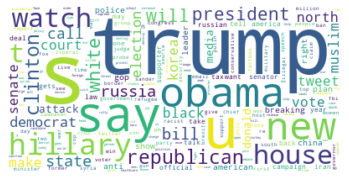

In [133]:
#word clouds of the corpus
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Importing Dataset
df = pd.read_csv("/content/gdrive/MyDrive/COMP 599 Project/Fake.csv")
df2 = pd.read_csv("/content/gdrive/MyDrive/COMP 599 Project/True.csv")

print(df.shape[0])
print(df2.shape[0])

#select dataset you want to explore (entire set) vs. true vs. fake
df = pd.concat([df,df2], axis = 0)
'''
#if fake
df = df
#if true
df = df2
'''

print(df.shape[0])
#Checking the Data
df.head()
#Checking for NaN values
df.isna().sum()
#Removing NaN Values
#df.dropna(inplace = True)
#Creating the text variable
text = " ".join(title for title in df.title)
text = cleanup_text([text])
text = text[0]

print(type(text))

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[('trump', 14897), ('u.s.', 4634), ('with', 3976), ('says', 3542), ('obama', 3245), ('after', 2579), ('hillary', 2364), ('from', 2000), ('over', 1999), ('house', 1997), ('watch', 1966), ('about', 1960), ('clinton', 1793), ('white', 1691), ('will', 1683), ('president', 1667), ('just', 1435), ('this', 1403), ('russia', 1353), ('bill', 1269), ('that', 1199), ('state', 1122), ('republican', 1065), ('north', 1034), ('election', 1031), ('against', 1005), ('news', 996), ('court', 994), ('korea', 973), ('senate', 934), ('black', 930), ('media', 925), ('donald', 906), ('breaking', 905), ('vote', 886), ('calls', 875), ('what', 851), ('china', 840), ('anti', 820), ('police', 813), ('more', 791), ('have', 780), ('republicans', 778), ('they', 765), ('campaign', 762), ('down', 760), ('america', 746), ('muslim', 736), ('deal', 722), ('iran', 717)]
[14897, 4634, 3976, 3542, 3245, 2579, 2364, 2000, 1999, 1997]


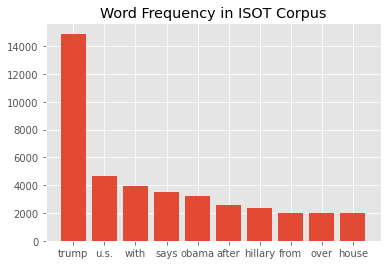

In [134]:
#word frequency from ISOT corpus
from collections import Counter
t = 'this is the textfile, and it is used to take words and count'

frequency_dict = dict(Counter(text.split()))

#sort this dictionary

frequency_dict = dict(sorted(frequency_dict.items(), key = lambda x: x[1], reverse = True))

#remove words with less than 3 length

for key in list(frequency_dict.keys()):
  if (len(key) <= 3):
    frequency_dict.pop(key)

print(list(frequency_dict.items())[:50])

frequencies = [x[1] for x in list(frequency_dict.items())[:10]]
labels = [x[0] for x in list(frequency_dict.items())[:10]]

print(frequencies)

import matplotlib.pyplot as plt

plt.bar(labels, frequencies)
plt.title("Word Frequency in ISOT Corpus")
plt.show()

In [142]:
#pick the top 30 words (excluding stop words and political words)
from itertools import chain

nltk.download('stopwords')
stop = stopwords.words('english')
political = list(chain.from_iterable([ ["democrat","republican"] , ["democrats","republicans"]  , ["liberal","conservative"] , ["liberals","conservatives"] , 
                             ["obama","mccain"] , ["kerry","bush"] , ["liberalism","conservatism"] , ["communism","capitalism"] , ["refugee","illegal"] ,
                             ["refugees","illegals"] , ["blue","red"] , ["globalist","isolationist"] , ['globalism','isolationism'] , ['obama','trump'] , 
                             ['hillary' , 'trump']])) + [ 'left','hillary', 'obama', 'democrat', 'liberal', 'clinton', 'socialism', 'socialist', 'communism', 'liberals', 'refugees', 'refugee'] +  ['right','trump', 'republican', 'donald', 'conservative', 'capitalism', 'capitalist', 'bush', 'mccain', 'conservatives', 'illegals', 'illegal']
print(list(political))


#eliminating stop words or political attribute words from the wordlist obtained from the frequency dictionary
newlist = [x for x in list(frequency_dict.keys()) if (not(x in political)) and (not(x in stop))][:30]


['democrat', 'republican', 'democrats', 'republicans', 'liberal', 'conservative', 'liberals', 'conservatives', 'obama', 'mccain', 'kerry', 'bush', 'liberalism', 'conservatism', 'communism', 'capitalism', 'refugee', 'illegal', 'refugees', 'illegals', 'blue', 'red', 'globalist', 'isolationist', 'globalism', 'isolationism', 'obama', 'trump', 'hillary', 'trump', 'left', 'hillary', 'obama', 'democrat', 'liberal', 'clinton', 'socialism', 'socialist', 'communism', 'liberals', 'refugees', 'refugee', 'right', 'trump', 'republican', 'donald', 'conservative', 'capitalism', 'capitalist', 'bush', 'mccain', 'conservatives', 'illegals', 'illegal']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
#calculate direct bias
from sklearn.decomposition import PCA
def compute_political_subspace(
    word_to_embedding: "dict[str, np.array]",
    political_attribute_words: "list[list[str, str]]",
    n_components: int = 1,
) -> np.array:
    pol_emb = list() 
    for x in political_attribute_words:
        pol_emb.append([word_to_embedding[x[0]],word_to_embedding[x[1]]])
    for l in pol_emb:
        mean = (l[0]+l[1])/2
        l[0] = l[0] - mean
        l[1] = l[1] - mean
    pol_emb = np.array(pol_emb)
    pol_emb = pol_emb.reshape(-1, pol_emb.shape[-1])
    pca = PCA(n_components)
    pca.fit(pol_emb)
    return pca.components_


def project(a: np.array, b: np.array) -> "tuple[float, np.array]":
    numer = np.dot(a,b)
    denom = np.dot(b,b)
    scalar = np.divide(numer,denom)
    vector_projection = np.multiply(scalar,b)
    return scalar, vector_projection

def debias_word_embedding(
    word: str, word_to_embedding: "dict[str, np.array]", gender_subspace: np.array
) -> np.array:
    # TODO: your work here
    
    w_embed = word_to_embedding[word]
    gender_direction = gender_subspace[0]
    s, proj = project(w_embed, gender_direction)
    
    return w_embed - proj

def hard_debias(
    word_to_embedding: "dict[str, np.array]",
    political_attribute_words: "list[list[str]]",
    n_components: int = 1) -> "dict[str, np.array]":
    gender_subspace = compute_political_subspace(word_to_embedding, political_attribute_words, n_components)
    all_words = list(word_to_embedding.keys())
    debiased_embeddings = list()
    for word in all_words:
        debiased_embeddings.append(debias_word_embedding(word,word_to_embedding,gender_subspace))
   
    dicts = {}
    for i,x in enumerate(all_words):
        dicts[x] = debiased_embeddings[i]
    
    return dicts

In [137]:
glove_embeddings = load_glove_embeddings("/content/glove.6B.300d.txt") 

In [138]:
political_attribute_words = [ ["democrat","republican"] , ["democrats","republicans"]  , ["liberal","conservative"] , ["liberals","conservatives"] , 
                             ["obama","mccain"] , ["kerry","bush"] , ["liberalism","conservatism"] , ["communism","capitalism"] , ["refugee","illegal"] ,
                             ["refugees","illegals"] , ["blue","red"] , ["globalist","isolationist"] , ['globalism','isolationism'] , ['obama','trump'] , 
                             ['clinton' , 'trump'], ['hillary','donald']]
political_subspace = compute_political_subspace(glove_embeddings,political_attribute_words)

In [139]:
debiased_embeddings = hard_debias(glove_embeddings, political_attribute_words)

In [162]:
import torch.nn.functional as F
from typing import Union, Callable
def cosine_similarity(a: np.array, b: np.array) -> float:
    # TODO: your work here
    a_tensor = torch.from_numpy(a)
    b_tensor = torch.from_numpy(b)
    return (F.cosine_similarity(a_tensor,b_tensor,0).item())


def compute_direct_bias(
    words: "list[str]",
    word_to_embedding: "dict[str, np.array]",
    gender_subspace: np.array,
    c: float = 0.25,
):
    # TODO: your work here
    N = len(words)
    gender_direction = gender_subspace[0]
    cs = 0
    for word in words:
        try:
            word_emb = word_to_embedding[word]
            cs += np.power(np.absolute(cosine_similarity(word_emb,gender_direction)),c)
        except KeyError:
            continue
    return cs/N

def dataset_component(word_frequency_dict, word_to_embedding, political_subspace):
  sum = np.zeros(300)

  N = 0
  for word in list(word_frequency_dict.keys()):
    try:
      word_emb = word_to_embedding[word]
      s, proj = project(word_emb, political_subspace[0])
      sum += proj*word_frequency_dict[word]
      N += word_frequency_dict[word]
    except KeyError:
      continue

  return sum/N 

def compute_direct_bias_2(
    words: "list[str]",
    word_to_embedding: "dict[str, np.array]",
    gender_subspace: np.array,
    c: float = 1,
):
    # TODO: your work here
    N = len(words)
    gender_direction = gender_subspace[0]
    cs = 0
    for word in words:
        try:
            word_emb = word_to_embedding[word]
            cs += np.power((cosine_similarity(word_emb,gender_direction)),c)
        except KeyError:
            continue
    return cs/N


def weat_association(
    w: str, A: "list[str]", B: "list[str]", word_to_embedding: "dict[str, np.array]"
) -> float:
    # TODO: your work here
    w_emb = word_to_embedding[w]
    A_emb = list()
    B_emb = list()
    for word in A:
        A_emb.append(word_to_embedding[word])
    for word in B:
        B_emb.append(word_to_embedding[word])
    
    mean_cos_a = np.mean([cosine_similarity(w_emb,att_emb) for att_emb in A_emb])
    mean_cos_b = np.mean([cosine_similarity(w_emb,att_emb) for att_emb in B_emb])
    weat = mean_cos_a - mean_cos_b

    return weat


def weat_differential_association(
    X: "list[str]",
    Y: "list[str]",
    A: "list[str]",
    B: "list[str]",
    word_to_embedding: "dict[str, np.array]",
    weat_association_func: Callable,
) -> float:
    # TODO: your work here

    diff_association_x = np.sum([weat_association_func(i,A,B,word_to_embedding) for i in X]) 
    diff_association_y = np.sum([weat_association_func(i,A,B,word_to_embedding) for i in Y])

    diff_association = diff_association_x - diff_association_y 
    
    return diff_association

In [143]:
compute_direct_bias(newlist, glove_embeddings, political_subspace)

0.6913613871886939

In [144]:
compute_direct_bias(newlist, debiased_embeddings, political_subspace)

8.041471892921258e-05

30

Some further testing was done below, to examine the political components of the ture vs. false dataset

23481
21417
21417
<class 'str'>


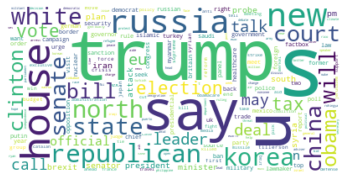

In [164]:
#word clouds of the corpus
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Importing Dataset
df = pd.read_csv("/content/gdrive/MyDrive/COMP 599 Project/Fake.csv")
df2 = pd.read_csv("/content/gdrive/MyDrive/COMP 599 Project/True.csv")

print(df.shape[0])
print(df2.shape[0])

df = df2 #true dataset
#df = df2

print(df.shape[0])
#Checking the Data
df.head()
#Checking for NaN values
df.isna().sum()
#Removing NaN Values
#df.dropna(inplace = True)
#Creating the text variable
text = " ".join(title for title in df.title)
text = cleanup_text([text])
text = text[0]

print(type(text))

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()



[('trump', 5561), ('u.s.', 4167), ('says', 2981), ('with', 1498), ('house', 1449), ('after', 1023), ('over', 1011), ('russia', 977), ('north', 926), ('korea', 888), ('white', 818), ('china', 782), ('from', 761), ('senate', 759), ('court', 725), ('will', 714), ('bill', 686), ('state', 666), ('obama', 665), ('clinton', 656), ('republican', 636), ('election', 582), ('deal', 553), ('vote', 545), ('iran', 524), ('talks', 523), ('president', 521), ('u.n.', 511), ('minister', 465), ('syria', 451), ('south', 445), ('against', 443), ('brexit', 437), ('calls', 426), ('factbox', 419), ('police', 418), ('government', 416), ('leader', 414), ('chief', 398), ('probe', 379), ('turkey', 377), ('congress', 370), ('russian', 362), ('more', 359), ('plan', 355), ('party', 352), ('sanctions', 347), ('official', 343), ('republicans', 340), ('security', 328)]
[5561, 4167, 2981, 1498, 1449, 1023, 1011, 977, 926, 888]


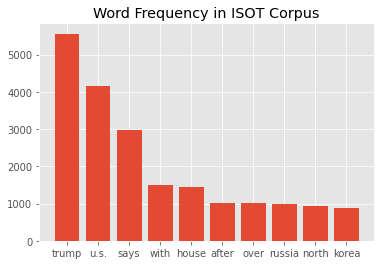

In [165]:
#word frequency from ISOT corpus
from collections import Counter
t = 'this is the textfile, and it is used to take words and count'

frequency_dict = dict(Counter(text.split()))

#sort this dictionary

frequency_dict = dict(sorted(frequency_dict.items(), key = lambda x: x[1], reverse = True))

#remove words with less than 3 length

for key in list(frequency_dict.keys()):
  if (len(key) <= 3):
    frequency_dict.pop(key)

print(list(frequency_dict.items())[:50])

frequencies = [x[1] for x in list(frequency_dict.items())[:10]]
labels = [x[0] for x in list(frequency_dict.items())[:10]]

print(frequencies)

import matplotlib.pyplot as plt

plt.bar(labels, frequencies)
plt.title("Word Frequency in ISOT Corpus")
plt.show()

In [166]:
#pick the top 30 words (excluding stop words and political words)
from itertools import chain

nltk.download('stopwords')
stop = stopwords.words('english')
political = list(chain.from_iterable([ ["democrat","republican"] , ["democrats","republicans"]  , ["liberal","conservative"] , ["liberals","conservatives"] , 
                             ["obama","mccain"] , ["kerry","bush"] , ["liberalism","conservatism"] , ["communism","capitalism"] , ["refugee","illegal"] ,
                             ["refugees","illegals"] , ["blue","red"] , ["globalist","isolationist"] , ['globalism','isolationism'] , ['obama','trump'] , 
                             ['hillary' , 'trump']])) + [ 'left','hillary', 'obama', 'democrat', 'liberal', 'clinton', 'socialism', 'socialist', 'communism', 'liberals', 'refugees', 'refugee'] +  ['right','trump', 'republican', 'donald', 'conservative', 'capitalism', 'capitalist', 'bush', 'mccain', 'conservatives', 'illegals', 'illegal']
print(list(political))


trueList = [x for x in list(frequency_dict.keys()) if (not(x in stop)) ][:30]


['democrat', 'republican', 'democrats', 'republicans', 'liberal', 'conservative', 'liberals', 'conservatives', 'obama', 'mccain', 'kerry', 'bush', 'liberalism', 'conservatism', 'communism', 'capitalism', 'refugee', 'illegal', 'refugees', 'illegals', 'blue', 'red', 'globalist', 'isolationist', 'globalism', 'isolationism', 'obama', 'trump', 'hillary', 'trump', 'left', 'hillary', 'obama', 'democrat', 'liberal', 'clinton', 'socialism', 'socialist', 'communism', 'liberals', 'refugees', 'refugee', 'right', 'trump', 'republican', 'donald', 'conservative', 'capitalism', 'capitalist', 'bush', 'mccain', 'conservatives', 'illegals', 'illegal']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [167]:
compute_direct_bias(trueList,glove_embeddings,political_subspace)

0.6991318429309616

In [168]:
compute_direct_bias(trueList,debiased_embeddings,political_subspace)

7.793450637644027e-05

In [169]:
component = dataset_component(frequency_dict, glove_embeddings, political_subspace)

print(cosine_similarity(component, political_subspace[0]))
import math
def magnitude(vector):
    return math.sqrt(sum(pow(element, 2) for element in vector))

print(magnitude(component))

1.0
1.03166684733512


23481
21417
23481
<class 'str'>


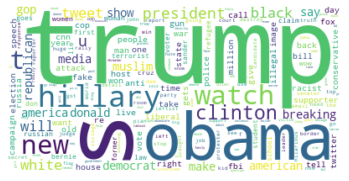

In [154]:
#word clouds of the corpus
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Importing Dataset
df = pd.read_csv("/content/gdrive/MyDrive/COMP 599 Project/Fake.csv")
df2 = pd.read_csv("/content/gdrive/MyDrive/COMP 599 Project/True.csv")

print(df.shape[0])
print(df2.shape[0])

df = df #false dataset
#df = df2

print(df.shape[0])
#Checking the Data
df.head()
#Checking for NaN values
df.isna().sum()
#Removing NaN Values
#df.dropna(inplace = True)
#Creating the text variable
text = " ".join(title for title in df.title)
text = cleanup_text([text])
text = text[0]

print(type(text))

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[('trump', 9336), ('obama', 2580), ('with', 2478), ('hillary', 2317), ('watch', 1937), ('about', 1699), ('after', 1556), ('just', 1409), ('this', 1305), ('from', 1239), ('president', 1146), ('clinton', 1137), ('that', 1060), ('over', 988), ('will', 969), ('black', 896), ('breaking', 896), ('news', 877), ('white', 873), ('donald', 848), ('what', 761), ('they', 719), ('media', 702), ('america', 701), ('muslim', 675), ('have', 642), ('down', 631), ('anti', 609), ('tweets', 602), ('gets', 597), ('bill', 583), ('against', 562), ('says', 561), ('house', 548), ('people', 511), ('their', 509), ('racist', 482), ('when', 477), ('u.s.', 467), ('campaign', 466), ('state', 456), ('calls', 449), ('election', 449), ('during', 442), ('republicans', 438), ('more', 432), ('liberal', 430), ('speech', 429), ('republican', 429), ('american', 421)]
[9336, 2580, 2478, 2317, 1937, 1699, 1556, 1409, 1305, 1239]


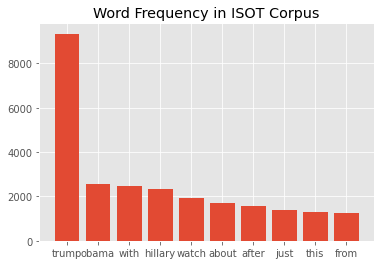

In [155]:
#word frequency from ISOT corpus
from collections import Counter
t = 'this is the textfile, and it is used to take words and count'

frequency_dict = dict(Counter(text.split()))

#sort this dictionary

frequency_dict = dict(sorted(frequency_dict.items(), key = lambda x: x[1], reverse = True))

#remove words with less than 3 length

for key in list(frequency_dict.keys()):
  if (len(key) <= 3):
    frequency_dict.pop(key)

print(list(frequency_dict.items())[:50])

frequencies = [x[1] for x in list(frequency_dict.items())[:10]]
labels = [x[0] for x in list(frequency_dict.items())[:10]]

print(frequencies)

import matplotlib.pyplot as plt

plt.bar(labels, frequencies)
plt.title("Word Frequency in ISOT Corpus")
plt.show()

In [158]:
#pick the top 30 words (excluding stop words and political words)
from itertools import chain

nltk.download('stopwords')
stop = stopwords.words('english')
political = list(chain.from_iterable([ ["democrat","republican"] , ["democrats","republicans"]  , ["liberal","conservative"] , ["liberals","conservatives"] , 
                             ["obama","mccain"] , ["kerry","bush"] , ["liberalism","conservatism"] , ["communism","capitalism"] , ["refugee","illegal"] ,
                             ["refugees","illegals"] , ["blue","red"] , ["globalist","isolationist"] , ['globalism','isolationism'] , ['obama','trump'] , 
                             ['hillary' , 'trump']])) + [ 'left','hillary', 'obama', 'democrat', 'liberal', 'clinton', 'socialism', 'socialist', 'communism', 'liberals', 'refugees', 'refugee'] +  ['right','trump', 'republican', 'donald', 'conservative', 'capitalism', 'capitalist', 'bush', 'mccain', 'conservatives', 'illegals', 'illegal']
print(list(political))


falseList = [x for x in list(frequency_dict.keys()) if (not(x in stop)) ][:30]


['democrat', 'republican', 'democrats', 'republicans', 'liberal', 'conservative', 'liberals', 'conservatives', 'obama', 'mccain', 'kerry', 'bush', 'liberalism', 'conservatism', 'communism', 'capitalism', 'refugee', 'illegal', 'refugees', 'illegals', 'blue', 'red', 'globalist', 'isolationist', 'globalism', 'isolationism', 'obama', 'trump', 'hillary', 'trump', 'left', 'hillary', 'obama', 'democrat', 'liberal', 'clinton', 'socialism', 'socialist', 'communism', 'liberals', 'refugees', 'refugee', 'right', 'trump', 'republican', 'donald', 'conservative', 'capitalism', 'capitalist', 'bush', 'mccain', 'conservatives', 'illegals', 'illegal']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
compute_direct_bias(falseList,glove_embeddings,political_subspace)

0.7040027915445044

In [160]:
compute_direct_bias(falseList,debiased_embeddings,political_subspace)

8.027087259816533e-05

In [163]:
component = dataset_component(frequency_dict, glove_embeddings, political_subspace)

print(cosine_similarity(component, political_subspace[0]))
import math
def magnitude(vector):
    return math.sqrt(sum(pow(element, 2) for element in vector))

print(magnitude(component))

1.0
0.7933900681347587
